In [21]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif, chi2, f_classif
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import RFE
import xgboost as xgb

from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import plot_model

In [2]:
df = pd.read_csv('D:\Garvit\CODE\Machine Learning Applied AI\Project\MCSDatasetNEXTCONLab\MCSDatasetNEXTCONLab.csv')

In [3]:
df.isnull().sum()

ID               0
Latitude         0
Longitude        0
Day              0
Hour             0
Minute           0
Duration         0
RemainingTime    0
Resources        0
Coverage         0
OnPeakHours      0
GridNumber       0
Ligitimacy       0
dtype: int64

In [4]:
train_data = df.loc[df['Day'] <= 4]
test_data = df.loc[df['Day'] >= 5]

In [5]:
X_train = train_data.drop(columns = ['Ligitimacy','ID','Day'], axis = 1)
X_test = test_data.drop(columns = ['Ligitimacy','ID','Day'], axis = 1)

In [6]:
y_train = train_data['Ligitimacy']
y_test = test_data['Ligitimacy']

In [7]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
X_train_scale=scale.fit_transform(X_train)
X_test=scale.transform(X_test)
df_features = pd.DataFrame(X_train_scale, columns= X_train.columns)
X_train = df_features
X_train

,Latitude,Longitude,Hour,Minute,Duration,RemainingTime,Resources,Coverage,OnPeakHours,GridNumber
0,0.349382,0.121251,0.173913,0.220339,0.6,0.6,0.888889,0.871429,0.0,0.365803
1,0.349438,0.117166,0.173913,0.389831,0.6,0.4,0.888889,0.871429,0.0,0.365803
2,0.349210,0.118817,0.173913,0.559322,0.6,0.2,0.888889,0.871429,0.0,0.341413
3,0.348132,0.120398,0.173913,0.728814,0.6,0.0,0.888889,0.871429,0.0,0.341413
4,0.374875,0.759031,0.652174,0.830508,0.4,0.4,0.444444,0.242857,0.0,0.390245
...,...,...,...,...,...,...,...,...,...,...
11989,0.363813,0.685792,0.043478,0.305085,0.2,0.2,1.000000,0.714286,0.0,0.365847
11990,0.365050,0.687544,0.043478,0.474576,0.2,0.0,1.000000,0.714286,0.0,0.365847
11991,0.324460,0.739797,0.521739,0.355932,0.4,0.4,0.333333,0.471429,0.0,0.341462
11992,0.325810,0.736266,0.521739,0.525424,0.4,0.2,0.333333,0.471429,0.0,0.341462


In [51]:
df_features = pd.DataFrame(X_test, columns= X_train.columns)
X_test = df_features
X_test

,Latitude,Longitude,Hour,Minute,Duration,RemainingTime,Resources,Coverage,OnPeakHours,GridNumber
0,0.911222,0.405458,0.521739,0.152542,0.8,0.8,0.888889,0.642857,0.0,0.902402
1,0.909054,0.407623,0.521739,0.322034,0.8,0.6,0.888889,0.642857,0.0,0.902402
2,0.908726,0.410267,0.521739,0.491525,0.8,0.4,0.888889,0.642857,0.0,0.902402
3,0.907856,0.409676,0.521739,0.661017,0.8,0.2,0.888889,0.642857,0.0,0.902402
4,0.906932,0.405811,0.521739,0.830508,0.8,0.0,0.888889,0.642857,0.0,0.902402
...,...,...,...,...,...,...,...,...,...,...
2485,0.184518,0.395204,0.434783,0.033898,0.8,0.4,0.000000,0.185714,1.0,0.195098
2486,0.185887,0.397011,0.434783,0.203390,0.8,0.2,0.000000,0.185714,1.0,0.195098
2487,0.187441,0.397505,0.434783,0.372881,0.8,0.0,0.000000,0.185714,1.0,0.195098
2488,0.869053,0.647410,0.043478,0.508475,0.2,0.2,0.111111,0.000000,0.0,0.853640


In [66]:
ts1=pd.DataFrame()
ts1["y"]= y_train
tsne = TSNE(n_components=2,learning_rate=300.0, verbose=1, random_state=0)
X_2d = tsne.fit_transform(X_train)
X_2d


D:\Code\envs\Topics_AI\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 11994 samples in 0.018s...
[t-SNE] Computed neighbors for 11994 samples in 1.675s...
[t-SNE] Computed conditional probabilities for sample 1000 / 11994
[t-SNE] Computed conditional probabilities for sample 2000 / 11994
[t-SNE] Computed conditional probabilities for sample 3000 / 11994
[t-SNE] Computed conditional probabilities for sample 4000 / 11994
[t-SNE] Computed conditional probabilities for sample 5000 / 11994
[t-SNE] Computed conditional probabilities for sample 6000 / 11994
[t-SNE] Computed conditional probabilities for sample 7000 / 11994
[t-SNE] Computed conditional probabilities for sample 8000 / 11994
[t-SNE] Computed conditional probabilities for sample 9000 / 11994
[t-SNE] Computed conditional probabilities for sample 10000 / 11994
[t-SNE] Computed conditional probabilities for sample 11000 / 11994
[t-SNE] Computed conditional probabilities for sample 11994 / 11994
[t-SNE] Mean sigma: 0.214641
[t-SNE] KL divergence

array([[-25.281776,  79.45599 ],
       [-25.042265,  79.14405 ],
       [-24.232828,  78.40714 ],
       ...,
       [-42.668262,  25.99347 ],
       [-41.724564,  26.689411],
       [-40.96663 ,  27.172955]], dtype=float32)

<AxesSubplot: title={'center': 'TSNE plot on training data'}, xlabel='comp-1', ylabel='comp-2'>

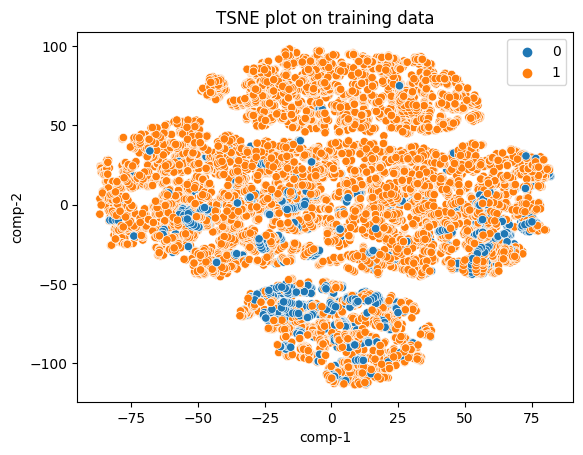

In [67]:
ts1["comp-1"] = X_2d[:,0]
ts1["comp-2"] = X_2d[:,1]
plt.title('TSNE plot on training data')
sns.scatterplot(x="comp-1", y="comp-2", hue=ts1.y.tolist(),
                data=ts1)

D:\Code\envs\Topics_AI\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2490 samples in 0.004s...
[t-SNE] Computed neighbors for 2490 samples in 0.170s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2490
[t-SNE] Computed conditional probabilities for sample 2000 / 2490
[t-SNE] Computed conditional probabilities for sample 2490 / 2490
[t-SNE] Mean sigma: 0.295624
[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.327286
[t-SNE] KL divergence after 1000 iterations: 1.258542


<AxesSubplot: title={'center': 'TSNE plot on testing data'}, xlabel='comp-1', ylabel='comp-2'>

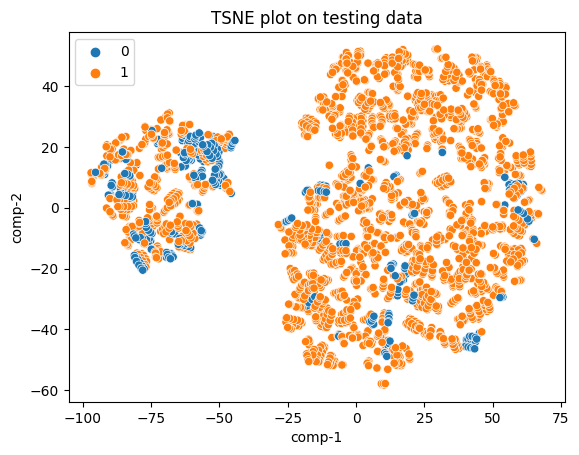

In [69]:
ts1=pd.DataFrame()
ts1["y"]= y_test
tsne = TSNE(n_components=2,learning_rate=300.0, verbose=1, random_state=0)
X_2d = tsne.fit_transform(X_test)
ts1["comp-1"] = X_2d[:,0]
ts1["comp-2"] = X_2d[:,1]
plt.title('TSNE plot on testing data')
sns.scatterplot(x="comp-1", y="comp-2", hue=ts1.y.tolist(),
                data=ts1)

## Ques 1

# KNN

In [114]:
knn = KNeighborsClassifier().fit(X_train, y_train)
pred_knn = knn.predict(X_test)
acc_knn = accuracy_score(y_test,pred_knn)
print(acc_knn)

0.8895582329317269


Confusion Matrix :
[[ 179  146]
 [ 129 2036]]


<AxesSubplot: title={'center': 'Confusion Matrix for KNN'}>

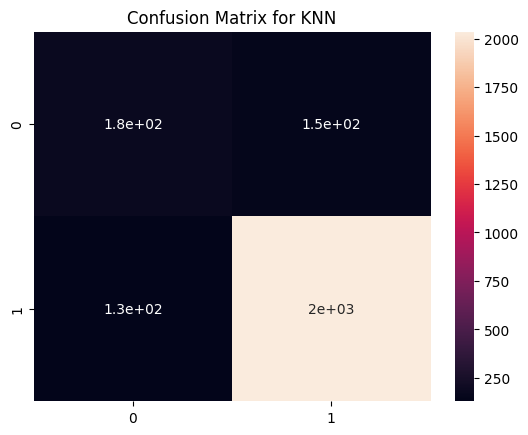

In [115]:
cf_matrix = confusion_matrix(y_test, pred_knn)
print("Confusion Matrix :")
print(cf_matrix)
import seaborn as sns
plt.title('Confusion Matrix for KNN')
sns.heatmap(cf_matrix, annot=True)

# Logistic Regression

In [116]:
# Fitting the evaluate
clf = LogisticRegression(random_state=42).fit(X_train, y_train)

# Predicting on the X_test
pred = clf.predict(X_test)

acc_log = accuracy_score(y_test, pred)
print(acc_log)

0.8674698795180723


Confusion Matrix :
[[  71  254]
 [  76 2089]]


<AxesSubplot: title={'center': 'Confusion Matrix for Logistic Regression'}>

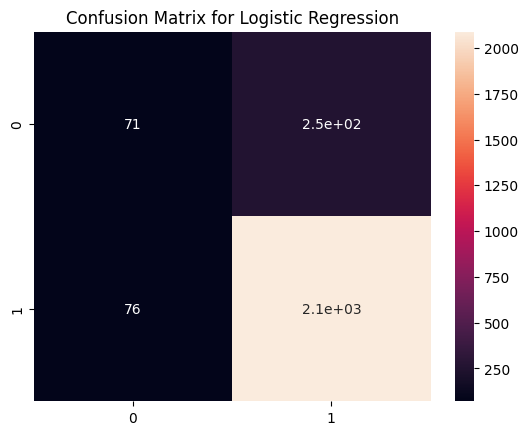

In [118]:
cf_matrix = confusion_matrix(y_test, pred)
print("Confusion Matrix :")
print(cf_matrix)
import seaborn as sns
plt.title('Confusion Matrix for Logistic Regression')
sns.heatmap(cf_matrix, annot=True)

# SVM

In [11]:
from sklearn import svm

clf_svm = svm.SVC()
clf_svm=clf_svm.fit(X_train, y_train)
# SVC()
pred = clf_svm.predict(X_test)
print(pred)
acc_SVM = accuracy_score(y_test, pred)
print(acc_SVM)

D:\Code\envs\Topics_AI\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


[1 1 1 ... 1 1 1]
0.876706827309237


Confusion Matrix :
[[  71  254]
 [  76 2089]]


<AxesSubplot: title={'center': 'Confusion Matrix for SVM'}>

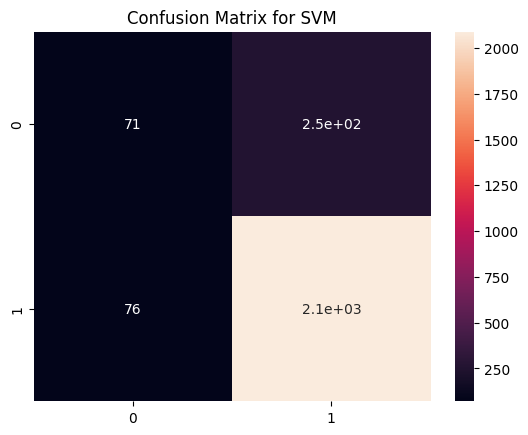

In [119]:
cf_matrix = confusion_matrix(y_test, pred)
print("Confusion Matrix :")
print(cf_matrix)
import seaborn as sns
plt.title('Confusion Matrix for SVM')
sns.heatmap(cf_matrix, annot=True)

# Decision Tree

In [120]:
from sklearn.tree import DecisionTreeClassifier
clf_DT = DecisionTreeClassifier(random_state=0)
clf_DT = clf_DT.fit(X_train,y_train)
y_pred_DT= clf_DT.predict(X_test)
acc_dt= accuracy_score(y_test, y_pred_DT)
print(acc_dt)

0.942570281124498


Confusion Matrix :
[[ 264   61]
 [  82 2083]]


<AxesSubplot: title={'center': 'Confusion Matrix for Decision Tree'}>

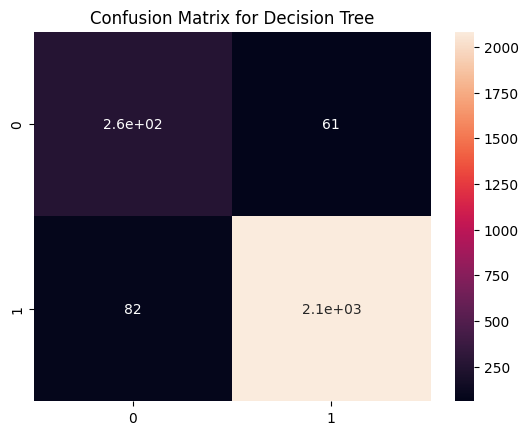

In [121]:
cf_matrix = confusion_matrix(y_test, y_pred_DT)
print("Confusion Matrix :")
print(cf_matrix)
import seaborn as sns
plt.title('Confusion Matrix for Decision Tree')
sns.heatmap(cf_matrix, annot=True)

# Naive Bayes

In [13]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
accuracy_Bayes = accuracy_score(y_test, y_pred)
print(accuracy_Bayes)

0.8437751004016064


D:\Code\envs\Topics_AI\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


Confusion Matrix :
[[ 320    5]
 [  29 2136]]


<AxesSubplot: title={'center': 'Confusion Matrix for Naives Bayes'}>

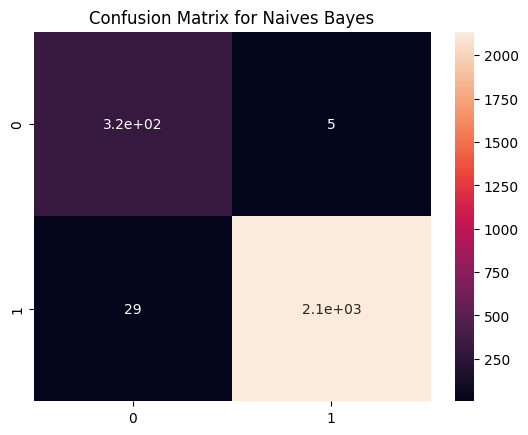

In [122]:
cf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :")
print(cf_matrix)
import seaborn as sns
plt.title('Confusion Matrix for Naives Bayes')
sns.heatmap(cf_matrix, annot=True)

# Making plot for all the accuracies

In [14]:

bar_list=[acc_knn *100 ,acc_log *100, acc_SVM*100, acc_dt*100, accuracy_Bayes*100]
name_list=['KNN','Logistic regression','SVM','Decision tree','Naive Bayes']
print(bar_list)

[88.95582329317268, 86.74698795180723, 87.6706827309237, 94.2570281124498, 84.37751004016064]


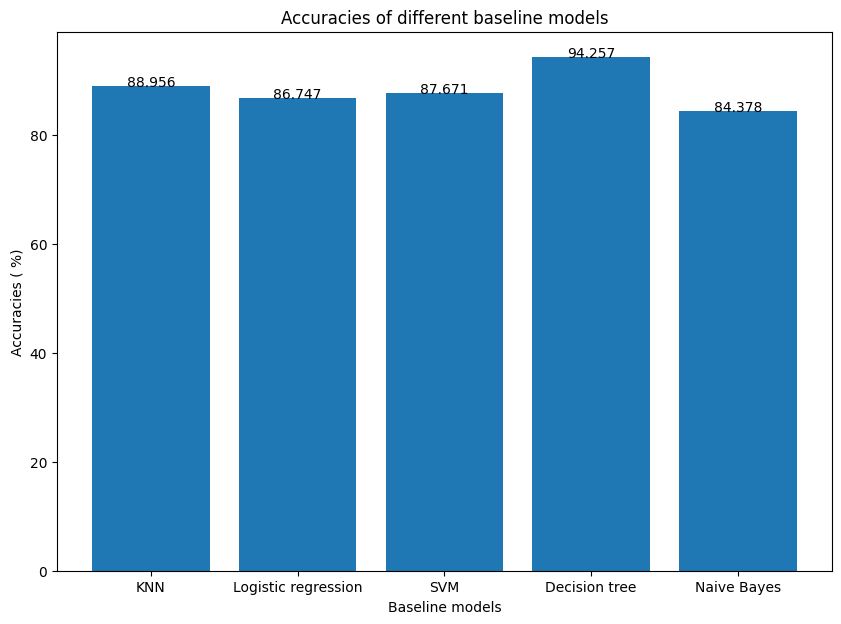

In [15]:
fig = plt.figure(figsize =(10, 7))
plt.bar(range(len(bar_list[0:5])),bar_list, tick_label=name_list)
for i in range(len(bar_list)):
        plt.text(i, bar_list[i], round(bar_list[i],3), ha = 'center')
plt.xlabel("Baseline models")
plt.ylabel("Accuracies ( %)")
plt.title("Accuracies of different baseline models")
plt.show()

## Decision Tree was chosen for the next part as it has the highest accuracy 

Counts of 0 and 1 :


1    12587
0     1897
Name: Ligitimacy, dtype: int64

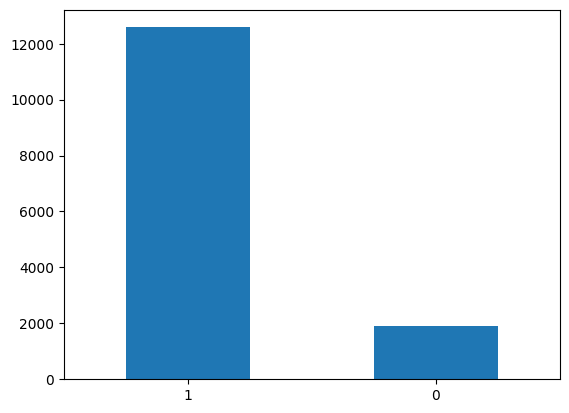

In [123]:
## Dataset is imbalanced
count_classes = pd.value_counts(df['Ligitimacy'],sort = True)
count_classes.plot(kind ='bar',rot=0)
print("Counts of 0 and 1 :")

pd.value_counts((df['Ligitimacy']))

## Using SMOTE for Fixing Imbalance Dataset

In [16]:
from imblearn.over_sampling import SMOTE

# Resample the minority class. You can change the strategy to 'auto' if you are not sure.
sm = SMOTE(sampling_strategy='minority', random_state=42)

# Fit the model to generate the data.
oversampled_trainX, oversampled_trainY = sm.fit_resample(X_train, y_train)
oversampled_train = pd.concat([pd.DataFrame(oversampled_trainX),pd.DataFrame(oversampled_trainY)], axis=1)
oversampled_train

,Latitude,Longitude,Hour,Minute,Duration,RemainingTime,Resources,Coverage,OnPeakHours,GridNumber,Ligitimacy
0,0.349382,0.121251,0.173913,0.220339,0.600000,0.600000,0.888889,0.871429,0.0,0.365803,1
1,0.349438,0.117166,0.173913,0.389831,0.600000,0.400000,0.888889,0.871429,0.0,0.365803,1
2,0.349210,0.118817,0.173913,0.559322,0.600000,0.200000,0.888889,0.871429,0.0,0.341413,1
3,0.348132,0.120398,0.173913,0.728814,0.600000,0.000000,0.888889,0.871429,0.0,0.341413,1
4,0.374875,0.759031,0.652174,0.830508,0.400000,0.400000,0.444444,0.242857,0.0,0.390245,1
...,...,...,...,...,...,...,...,...,...,...,...
20839,0.923332,0.414601,0.391304,0.910656,0.636435,0.400000,0.979758,0.616888,1.0,0.926792,0
20840,0.472024,0.733192,0.304348,0.630327,0.691122,0.600000,0.898753,0.215721,1.0,0.474524,0
20841,0.917507,0.421494,0.713010,0.691543,1.000000,0.200000,0.888889,0.679974,0.0,0.907286,0
20842,0.499284,0.642638,0.654663,0.700888,0.600000,0.200000,0.928046,0.195911,0.0,0.504985,0


In [17]:
knn = KNeighborsClassifier().fit(oversampled_trainX, oversampled_trainY)
clf_log = LogisticRegression(random_state=0).fit(oversampled_trainX, oversampled_trainY)
clf_svm=svm.SVC().fit(oversampled_trainX, oversampled_trainY)
clf_dt=DecisionTreeClassifier(random_state=0).fit(oversampled_trainX, oversampled_trainY)
clf_bayes=GaussianNB().fit(oversampled_trainX, oversampled_trainY)


In [18]:
pred_knn = knn.predict(X_test)
acc_knn = accuracy_score(y_test,pred_knn)
print(acc_knn)
pred_log = clf_log.predict(X_test)
acc_log = accuracy_score(y_test, pred_log)
print(acc_log)
pred_svm = clf_svm.predict(X_test)
acc_SVM = accuracy_score(y_test, pred_svm)
print(acc_SVM)
pred_dt=clf_dt.predict(X_test)
acc_dt = accuracy_score(y_test, pred_dt)
print(acc_dt)
pred_bayes = clf_bayes.predict(X_test)
accuracy_Bayes = accuracy_score(y_test, pred_bayes)
print(accuracy_Bayes)

D:\Code\envs\Topics_AI\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0.7895582329317269
0.6991967871485943


D:\Code\envs\Topics_AI\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
D:\Code\envs\Topics_AI\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


0.7775100401606426
0.9120481927710843
0.7473895582329317


D:\Code\envs\Topics_AI\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\Code\envs\Topics_AI\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


# Ques 2

# Dimension Reduction

## 1. PCA

(20844, 1)
(20844, 2)


D:\Code\envs\Topics_AI\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
D:\Code\envs\Topics_AI\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
D:\Code\envs\Topics_AI\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


(20844, 3)


D:\Code\envs\Topics_AI\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


(20844, 4)
(20844, 5)


D:\Code\envs\Topics_AI\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


(20844, 6)


D:\Code\envs\Topics_AI\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
D:\Code\envs\Topics_AI\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
D:\Code\envs\Topics_AI\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


(20844, 7)
(20844, 8)


D:\Code\envs\Topics_AI\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


(20844, 9)


D:\Code\envs\Topics_AI\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


(20844, 10)
[0.6012048192771084, 0.7738955823293173, 0.8048192771084337, 0.8257028112449799, 0.8333333333333334, 0.8393574297188755, 0.8682730923694779, 0.8706827309236947, 0.8734939759036144, 0.8710843373493976]
0.8734939759036144
[0.9120481927710843, 0.9120481927710843, 0.9120481927710843, 0.9120481927710843, 0.9120481927710843, 0.9120481927710843, 0.9120481927710843, 0.9120481927710843]


Text(0, 0.5, 'Accuracy Score')

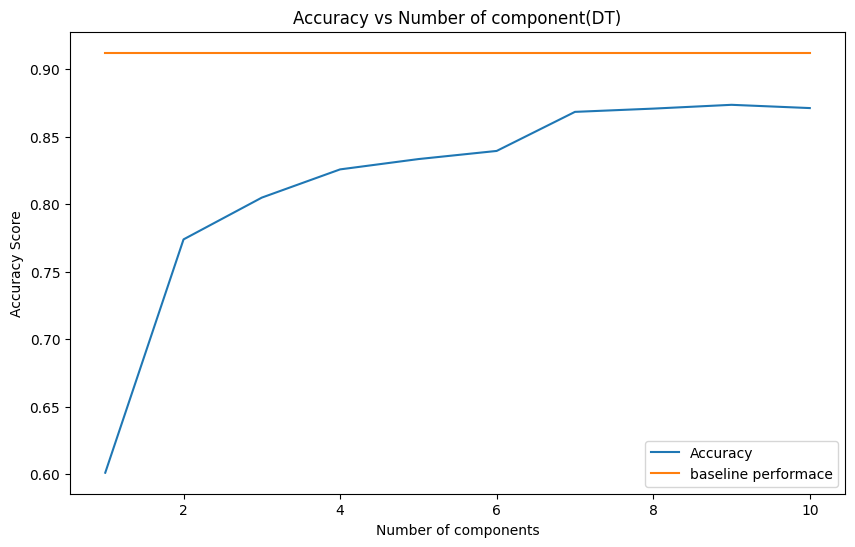

In [19]:
accuracy=[]
accuracy_dt=[]
for i in range(1,11):
    pca = PCA(n_components = i, random_state=0)
    x_pcatr=pca.fit_transform(oversampled_trainX)
    x_pcate=pca.transform(X_test)
    print(x_pcatr.shape)
    clf = DecisionTreeClassifier(random_state=0).fit(x_pcatr, oversampled_trainY)
    pred = clf.predict(x_pcate)
    accuracy.append(accuracy_score(y_test, pred))
print(accuracy)
max_accuracy=max(accuracy)
print(max_accuracy)
accuracy_dt.append(acc_dt)
print(accuracy_dt*8)
plt.figure(figsize=(10,6))
plt.title("Accuracy vs Number of component(DT)")
sns.lineplot(x = range(1,11) ,y= accuracy, label = "Accuracy")
sns.lineplot(x = range(1,11), y=accuracy_dt*10,label = "baseline performace")
plt.xlabel("Number of components")
plt.ylabel("Accuracy Score")

## 2, Auto Encoder

In [22]:
from keras.models import Sequential
AE_DT_acc=[]
n_inputs_over = oversampled_trainX.shape[1] # Number of inputs
for i in range(1,11):
    visible = Input(shape = (n_inputs_over,))
#Define Encoder
#level 1
    e = Dense(n_inputs_over*2)(visible) # e = encoder
    e = BatchNormalization()(e)
    e = LeakyReLU()(e)

# level 2 
    e = Dense(n_inputs_over)(e)
    e = BatchNormalization()(e)
    e = LeakyReLU()(e)

#Bottleneck 
    n_bottleneck = round(float(n_inputs_over)/2.0)
    bottleneck = Dense(n_bottleneck)(e)

  # define an encoder model (without the decoder)
    encoder = Model(inputs=visible, outputs=bottleneck)
    plot_model(encoder, 'encoder_no_compress.png', show_shapes=True)
# save the encoder to file
    encoder.save('encoder_project_oversampled.h5')

#   ...
# load the model from file
    encoder = load_model('encoder_project_oversampled.h5')


# encode the train data
    X_train_encode = encoder.predict(oversampled_trainX)
# encode the test data
    X_test_encode = encoder.predict(X_test)

  # define the model dt using autoecoder
    model_dt= DecisionTreeClassifier()
# fit the model on the training set
    model_dt.fit(X_train_encode, oversampled_trainY)
# make predictions on the test set
    yhat = model_dt.predict(X_test_encode)
    AE_DT_acc.append(accuracy_score(y_test, yhat))


You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
78/78 [==============================] - 0s 1ms/step
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
78/78 [==============================] - 0s 1ms/step
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
78/78 [==============================] - 0s 1ms/step
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
78/78 [==============================] - 0s 1ms/step
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
78/78 [==============================] - 0s

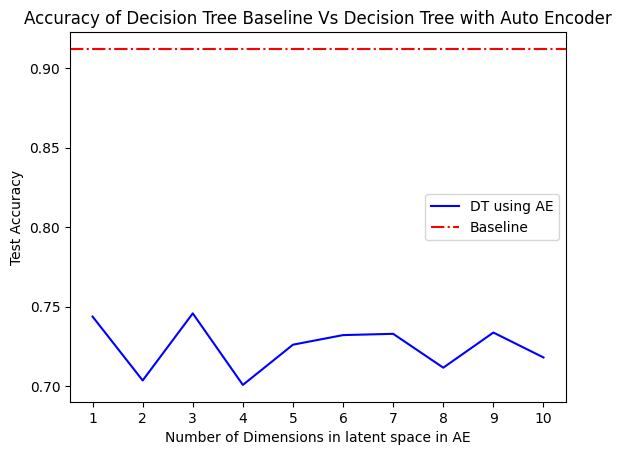

In [23]:
plt.figure()
plt.title('Accuracy of Decision Tree Baseline Vs Decision Tree with Auto Encoder')
plt.xlabel('Number of Dimensions in latent space in AE')
plt.ylabel('Test Accuracy')
plt.xticks(np.arange(len(AE_DT_acc)), np.arange(1, len(AE_DT_acc)+1))
plt.plot(AE_DT_acc, color='blue', label='DT using AE')
plt.axhline(acc_dt, color = 'red', linestyle = '-.',label='Baseline')
plt.legend()
plt.show()

## Comparing both of them

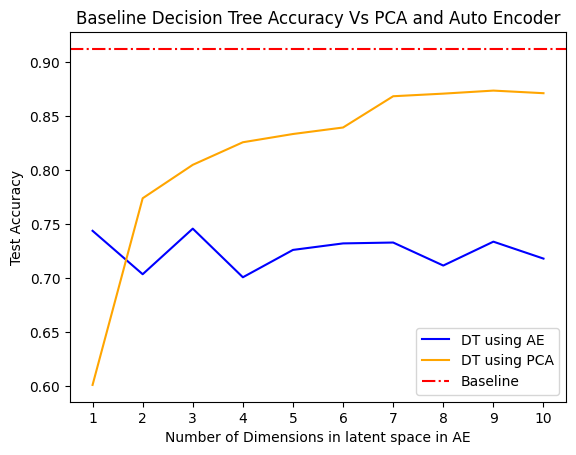

In [24]:
plt.figure()
plt.title('Baseline Decision Tree Accuracy Vs PCA and Auto Encoder')
plt.xlabel('Number of Dimensions in latent space in AE')
plt.ylabel('Test Accuracy')
plt.xticks(np.arange(len(AE_DT_acc)), np.arange(1, len(AE_DT_acc)+1))
plt.plot(AE_DT_acc, color='blue', label='DT using AE')
plt.plot(accuracy,color ='orange', label='DT using PCA')

plt.axhline(acc_dt, color = 'red', linestyle = '-.',label='Baseline')
plt.legend()
plt.show()

## It was observed that both of them performs worse in comparsion to the Baseline model. Lets see for the feature selection methods

# Ques 2.2 Feature Selection

In [25]:
def select_feature(X_train, y_train, X_test, y_test, FSM, model):
    fs = FSM
    fs.fit(X_train, y_train)
    X_train_new = fs.transform(X_train)
    X_test_new = fs.transform(X_test) 
    model.fit(X_train_new, y_train)
    y_pred = model.predict(X_test_new)
    acc = accuracy_score(y_test, y_pred) * 100
    return acc

In [40]:
dt=DecisionTreeClassifier(random_state=0)
acc_dict_dt = {}
acc_dict_dt_info_gain = {}
acc_dict_dt_wrapper = {}

In [28]:
pca_accuracydt=[]
pca_accuracydt.append(accuracy_pca*100)
accuracy_dtb=[]
accuracy_dtb.append(accuracy_dt[0]*100)


# Filter method

['OnPeakHours']
{1: 79.83935742971887, 2: 85.58232931726909, 3: 78.91566265060241, 4: 83.13253012048193, 5: 86.3855421686747, 6: 91.84738955823293, 7: 91.72690763052209, 8: 91.84738955823293, 9: 90.40160642570281, 10: 91.20481927710843}
['Resources' 'OnPeakHours']
{1: 79.83935742971887, 2: 85.58232931726909, 3: 78.91566265060241, 4: 83.13253012048193, 5: 86.3855421686747, 6: 91.84738955823293, 7: 91.72690763052209, 8: 91.84738955823293, 9: 90.40160642570281, 10: 91.20481927710843}
['Duration' 'Resources' 'OnPeakHours']
{1: 79.83935742971887, 2: 85.58232931726909, 3: 78.91566265060241, 4: 83.13253012048193, 5: 86.3855421686747, 6: 91.84738955823293, 7: 91.72690763052209, 8: 91.84738955823293, 9: 90.40160642570281, 10: 91.20481927710843}
['Longitude' 'Duration' 'Resources' 'OnPeakHours']
{1: 79.83935742971887, 2: 85.58232931726909, 3: 78.91566265060241, 4: 83.13253012048193, 5: 86.3855421686747, 6: 91.84738955823293, 7: 91.72690763052209, 8: 91.84738955823293, 9: 90.40160642570281, 10: 9

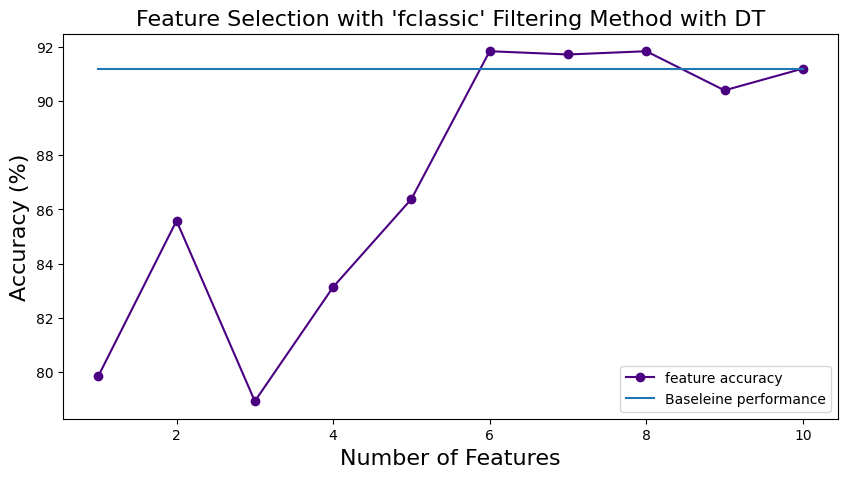

Maximum accuracy: 91.84738955823293
Best number of features: 6


In [108]:
from numpy import array
for i in range(1,11): ## As we decided to choose 6 features for PCA
    fsm =  SelectKBest(f_classif, k=i) #Filter Method  
    acc1 = select_feature(oversampled_trainX, oversampled_trainY, X_test, y_test, fsm, dt)
    acc_dict_dt[i] = acc1
    filters = fsm.get_support()
    column_headers = list(oversampled_trainX.columns.values)
    features = array(column_headers)
    print(features[filters])
    print(acc_dict_dt)

plt.figure(figsize=(10,5))
plt.plot(color="indigo",marker='o', *zip(*sorted(acc_dict_dt.items())), label ='feature accuracy')
# plt.plot(range(1,11),pca_accuracydt*10, label = 'Pca  max accuracy performace')
plt.plot(range(1,11),accuracy_dtb*10, label='Baseleine performance')
Title = "Feature Selection with 'fclassic' Filtering Method with DT"
plt.title(Title, fontsize=16)
plt.xlabel("Number of Features", fontsize=16)
plt.ylabel("Accuracy (%)", fontsize=16)
plt.legend()
plt.show()
print("Maximum accuracy:", max(acc_dict_dt.values()))
print("Best number of features:", max(acc_dict_dt, key=acc_dict_dt.get))

## Information Gain Method

{1: 97.59036144578313, 2: 97.14859437751005, 3: 97.71084337349397, 4: 96.74698795180723, 5: 95.90361445783132, 6: 95.18072289156626, 7: 93.33333333333333, 8: 92.69076305220884, 9: 90.60240963855422, 10: 91.20481927710843}
{1: 97.59036144578313, 2: 97.14859437751005, 3: 97.71084337349397, 4: 96.74698795180723, 5: 95.90361445783132, 6: 95.18072289156626, 7: 93.33333333333333, 8: 92.69076305220884, 9: 90.60240963855422, 10: 91.20481927710843}
{1: 97.59036144578313, 2: 97.14859437751005, 3: 97.71084337349397, 4: 96.74698795180723, 5: 95.90361445783132, 6: 95.18072289156626, 7: 93.33333333333333, 8: 92.69076305220884, 9: 90.60240963855422, 10: 91.20481927710843}
{1: 97.59036144578313, 2: 97.14859437751005, 3: 97.71084337349397, 4: 96.74698795180723, 5: 95.90361445783132, 6: 95.18072289156626, 7: 93.33333333333333, 8: 92.69076305220884, 9: 90.60240963855422, 10: 91.20481927710843}
{1: 97.59036144578313, 2: 97.14859437751005, 3: 97.71084337349397, 4: 96.74698795180723, 5: 95.90361445783132, 6

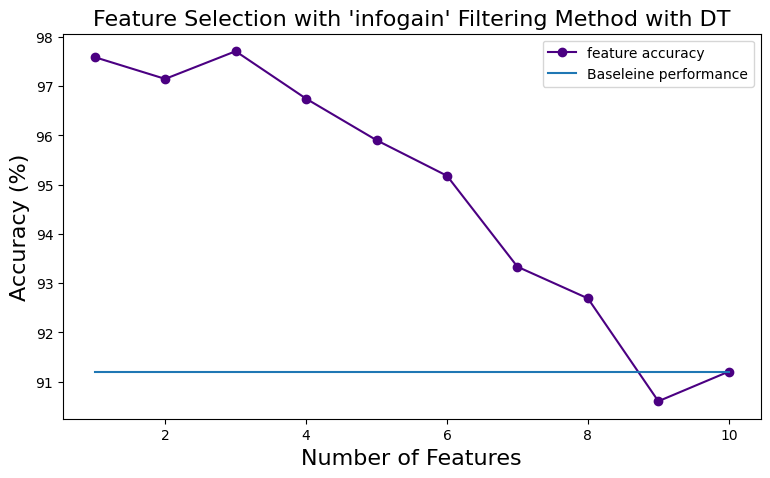

Maximum accuracy: 97.71084337349397


In [107]:
for i in range(1,11): ## As we decided to choose 6 features for PCA
    fsm =  SelectKBest(mutual_info_classif, k=i) # Information Gain  
    acc1 = select_feature(oversampled_trainX, oversampled_trainY, X_test, y_test, fsm, dt)
    acc_dict_dt_info_gain[i] = acc1
    print(acc_dict_dt_info_gain)

plt.figure(figsize=(9,5))
plt.plot(color="indigo",marker='o', *zip(*sorted(acc_dict_dt_info_gain.items())), label ='feature accuracy')
# plt.plot(range(1,11),pca_accuracydt*10, label = 'Pca  max accuracy performace')
plt.plot(range(1,11),accuracy_dtb*10, label='Baseleine performance')
Title = "Feature Selection with 'infogain' Filtering Method with DT"
plt.title(Title, fontsize=16)
plt.xlabel("Number of Features", fontsize=16)
plt.ylabel("Accuracy (%)", fontsize=16)
plt.legend()
plt.show()
print("Maximum accuracy:", max(acc_dict_dt_info_gain.values()))
# print("Best number of features:", max(acc_dict_dt_info_gain, key=acc_dict_dt.get))

D:\Code\envs\Topics_AI\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SequentialFeatureSelector was fitted with feature names
  warnings.warn(


{1: 97.59036144578313, 2: 97.38955823293173, 3: 97.59036144578313, 4: 97.51004016064257, 5: 97.83132530120481, 6: 96.62650602409639, 7: 93.73493975903614, 8: 94.53815261044177, 9: 92.89156626506025, 10: 91.20481927710843}
['GridNumber']


D:\Code\envs\Topics_AI\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SequentialFeatureSelector was fitted with feature names
  warnings.warn(


{1: 97.59036144578313, 2: 97.38955823293173, 3: 97.59036144578313, 4: 97.51004016064257, 5: 97.83132530120481, 6: 96.62650602409639, 7: 93.73493975903614, 8: 94.53815261044177, 9: 92.89156626506025, 10: 91.20481927710843}
['Coverage' 'GridNumber']


D:\Code\envs\Topics_AI\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SequentialFeatureSelector was fitted with feature names
  warnings.warn(


{1: 97.59036144578313, 2: 97.38955823293173, 3: 97.59036144578313, 4: 97.51004016064257, 5: 97.83132530120481, 6: 96.62650602409639, 7: 93.73493975903614, 8: 94.53815261044177, 9: 92.89156626506025, 10: 91.20481927710843}
['Latitude' 'Coverage' 'GridNumber']


D:\Code\envs\Topics_AI\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SequentialFeatureSelector was fitted with feature names
  warnings.warn(


{1: 97.59036144578313, 2: 97.38955823293173, 3: 97.59036144578313, 4: 97.51004016064257, 5: 97.83132530120481, 6: 96.62650602409639, 7: 93.73493975903614, 8: 94.53815261044177, 9: 92.89156626506025, 10: 91.20481927710843}
['Latitude' 'Minute' 'Coverage' 'GridNumber']


D:\Code\envs\Topics_AI\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SequentialFeatureSelector was fitted with feature names
  warnings.warn(


{1: 97.59036144578313, 2: 97.38955823293173, 3: 97.59036144578313, 4: 97.51004016064257, 5: 97.83132530120481, 6: 96.62650602409639, 7: 93.73493975903614, 8: 94.53815261044177, 9: 92.89156626506025, 10: 91.20481927710843}
['Latitude' 'Longitude' 'Minute' 'Coverage' 'GridNumber']


D:\Code\envs\Topics_AI\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SequentialFeatureSelector was fitted with feature names
  warnings.warn(


{1: 97.59036144578313, 2: 97.38955823293173, 3: 97.59036144578313, 4: 97.51004016064257, 5: 97.83132530120481, 6: 96.62650602409639, 7: 93.73493975903614, 8: 94.53815261044177, 9: 92.89156626506025, 10: 91.20481927710843}
['Latitude' 'Longitude' 'Minute' 'Coverage' 'OnPeakHours' 'GridNumber']


D:\Code\envs\Topics_AI\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SequentialFeatureSelector was fitted with feature names
  warnings.warn(


{1: 97.59036144578313, 2: 97.38955823293173, 3: 97.59036144578313, 4: 97.51004016064257, 5: 97.83132530120481, 6: 96.62650602409639, 7: 93.73493975903614, 8: 94.53815261044177, 9: 92.89156626506025, 10: 91.20481927710843}
['Latitude' 'Longitude' 'Minute' 'Resources' 'Coverage' 'OnPeakHours'
 'GridNumber']


D:\Code\envs\Topics_AI\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SequentialFeatureSelector was fitted with feature names
  warnings.warn(


{1: 97.59036144578313, 2: 97.38955823293173, 3: 97.59036144578313, 4: 97.51004016064257, 5: 97.83132530120481, 6: 96.62650602409639, 7: 93.73493975903614, 8: 94.53815261044177, 9: 92.89156626506025, 10: 91.20481927710843}
['Latitude' 'Longitude' 'Minute' 'RemainingTime' 'Resources' 'Coverage'
 'OnPeakHours' 'GridNumber']


D:\Code\envs\Topics_AI\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SequentialFeatureSelector was fitted with feature names
  warnings.warn(


{1: 97.59036144578313, 2: 97.38955823293173, 3: 97.59036144578313, 4: 97.51004016064257, 5: 97.83132530120481, 6: 96.62650602409639, 7: 93.73493975903614, 8: 94.53815261044177, 9: 92.89156626506025, 10: 91.20481927710843}
['Latitude' 'Longitude' 'Hour' 'Minute' 'RemainingTime' 'Resources'
 'Coverage' 'OnPeakHours' 'GridNumber']


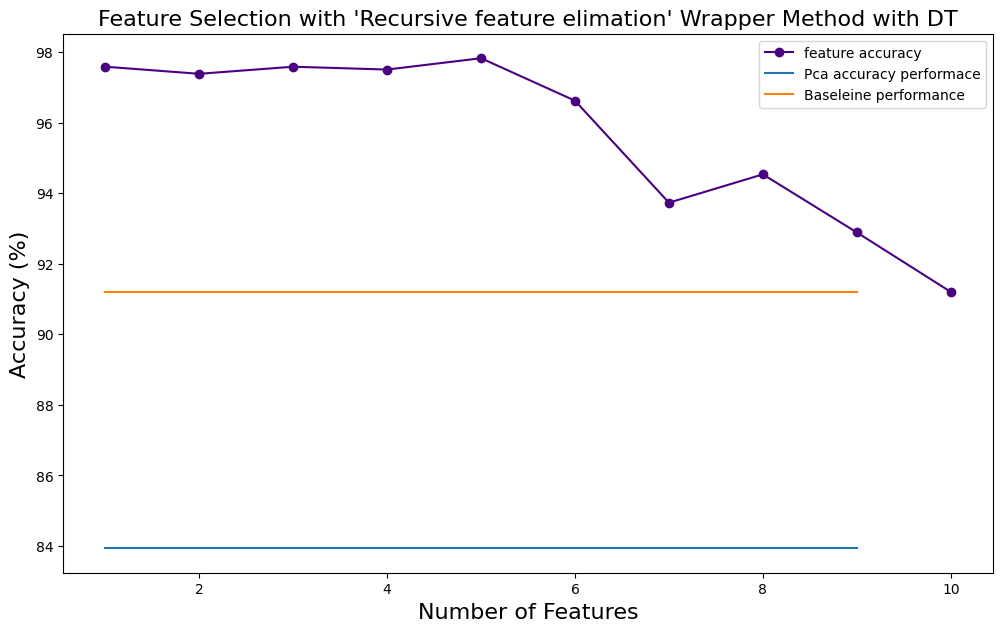

Maximum accuracy: 97.83132530120481
Best number of features: 5


In [44]:
from numpy import array 
for i in range(1,10): #10 features
    sfs = SequentialFeatureSelector(dt, n_features_to_select=i) # Wrapping Method   
    acc2 = select_feature(oversampled_trainX, oversampled_trainY, X_test, y_test, sfs, dt)
    acc_dict_dt_wrapper[i] = acc2
    print(acc_dict_dt_wrapper)
    filters = sfs.get_support()
    column_headers = list(oversampled_trainX.columns.values)
    features = array(column_headers)
    print(features[filters])

plt.figure(figsize=(12,7))
plt.plot(color="indigo",marker='o', *zip(*sorted(acc_dict_dt_wrapper.items())), label ='feature accuracy')
plt.plot(range(1,10),pca_accuracydt*9, label = 'Pca accuracy performace')
plt.plot(range(1,10),accuracy_dtb*9, label='Baseleine performance')
Title = "Feature Selection with 'Recursive feature elimation' Wrapper Method with DT"
plt.title(Title, fontsize=16)
plt.xlabel("Number of Features", fontsize=16)
plt.ylabel("Accuracy (%)", fontsize=16)
plt.legend()
plt.show()


print("Maximum accuracy:", max(acc_dict_dt_wrapper.values()))
print("Best number of features:", max(acc_dict_dt_wrapper, key=acc_dict_dt_wrapper.get))

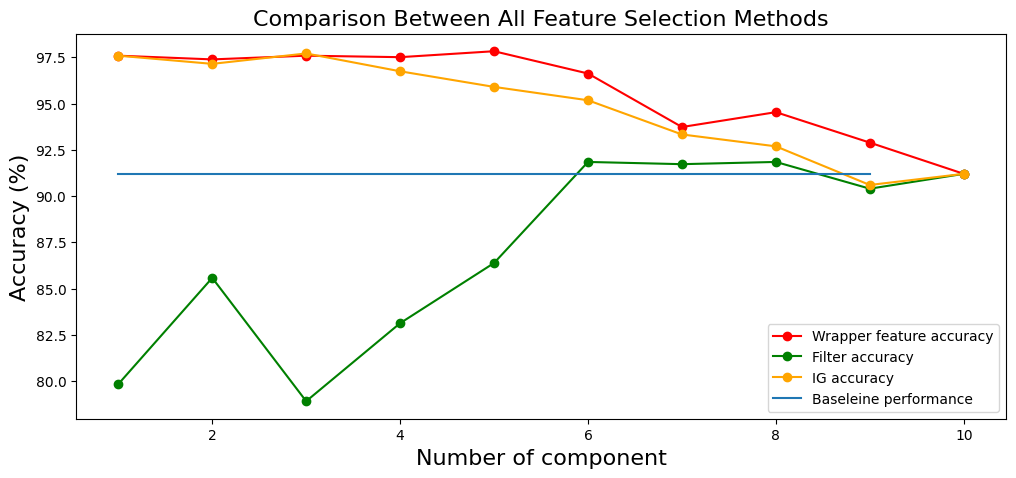

In [106]:
## Plotting all the feature selections graphs together
plt.figure(figsize=(12,5))

plt.plot(color="red",marker='o', *zip(*sorted(acc_dict_dt_wrapper.items())), label ='Wrapper feature accuracy')
plt.plot(color="green",marker='o', *zip(*sorted(acc_dict_dt.items())), label ='Filter accuracy')
plt.plot(color="orange",marker='o', *zip(*sorted(acc_dict_dt_info_gain.items())), label ='IG accuracy')
plt.plot(range(1,10),accuracy_dtb*9, label='Baseleine performance')

Title = "Comparison Between All Feature Selection Methods"
plt.title(Title, fontsize=16)
plt.xlabel("Number of component", fontsize=16)
plt.ylabel("Accuracy (%)", fontsize=16)
plt.legend()
plt.show()


#### From this it can be deduced that the Wrapper method have the highest accuracy on n_component = 5. And will taken for the further processing of the model. As it perform better in comparison to the baseline model

### Removing the columns that are not required

In [52]:
oversampled_trainX_dfrop = oversampled_trainX.drop(columns = ['Hour', 'Duration', 'RemainingTime','Resources','OnPeakHours'], axis = 1)
X_test_drop = X_test.drop(columns = ['Hour', 'Duration', 'RemainingTime','Resources','OnPeakHours'], axis = 1)


#### Making the TSNE Plot after the first Improvement

D:\Code\envs\Topics_AI\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 20844 samples in 0.019s...
[t-SNE] Computed neighbors for 20844 samples in 0.750s...
[t-SNE] Computed conditional probabilities for sample 1000 / 20844
[t-SNE] Computed conditional probabilities for sample 2000 / 20844
[t-SNE] Computed conditional probabilities for sample 3000 / 20844
[t-SNE] Computed conditional probabilities for sample 4000 / 20844
[t-SNE] Computed conditional probabilities for sample 5000 / 20844
[t-SNE] Computed conditional probabilities for sample 6000 / 20844
[t-SNE] Computed conditional probabilities for sample 7000 / 20844
[t-SNE] Computed conditional probabilities for sample 8000 / 20844
[t-SNE] Computed conditional probabilities for sample 9000 / 20844
[t-SNE] Computed conditional probabilities for sample 10000 / 20844
[t-SNE] Computed conditional probabilities for sample 11000 / 20844
[t-SNE] Computed conditional probabilities for sample 12000 / 20844
[t-SNE] Computed conditional probabilities for sam

<AxesSubplot: title={'center': 'TSNE plot on training data'}, xlabel='comp-1', ylabel='comp-2'>

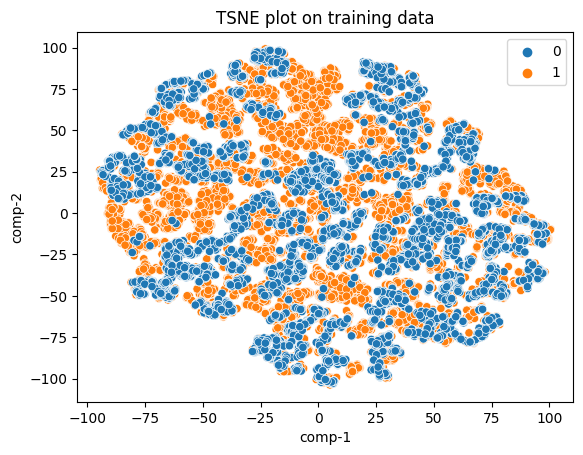

In [82]:
ts_fs=pd.DataFrame()
ts_fs["y"]= oversampled_trainY
tsne = TSNE(n_components=2,learning_rate=300.0, verbose=1, random_state=0)
X_fs_ts = tsne.fit_transform(oversampled_trainX_dfrop)
ts_fs["comp-1"] = X_fs_ts[:,0]
ts_fs["comp-2"] = X_fs_ts[:,1]
plt.title('TSNE plot on training data')
sns.scatterplot(x="comp-1", y="comp-2", hue=ts_fs.y.tolist(),
                data=ts_fs)

D:\Code\envs\Topics_AI\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2490 samples in 0.003s...
[t-SNE] Computed neighbors for 2490 samples in 0.066s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2490
[t-SNE] Computed conditional probabilities for sample 2000 / 2490
[t-SNE] Computed conditional probabilities for sample 2490 / 2490
[t-SNE] Mean sigma: 0.125600
[t-SNE] KL divergence after 250 iterations with early exaggeration: 74.377655
[t-SNE] KL divergence after 1000 iterations: 1.192250


<AxesSubplot: title={'center': 'TSNE plot on testing data'}, xlabel='comp-1', ylabel='comp-2'>

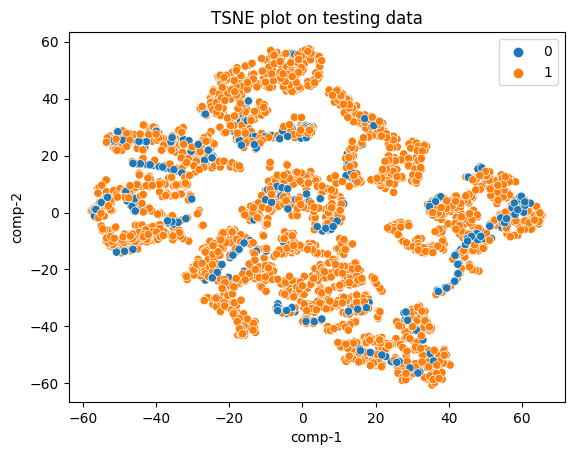

In [98]:
ts1=pd.DataFrame()
ts1["y"]= y_test
tsne = TSNE(n_components=2,learning_rate=300.0, verbose=1, random_state=0)
X_2d = tsne.fit_transform(X_test_drop)
ts1["comp-1"] = X_2d[:,0]
ts1["comp-2"] = X_2d[:,1]
plt.title('TSNE plot on testing data')
sns.scatterplot(x="comp-1", y="comp-2", hue=ts1.y.tolist(),
                data=ts1)

### Confusion Matrix

In [109]:
from sklearn.tree import DecisionTreeClassifier
clf_DT = DecisionTreeClassifier(random_state=0)
clf_DT = clf_DT.fit(oversampled_trainX_dfrop,oversampled_trainY)
y_pred_DT= clf_DT.predict(X_test_drop)
acc_dt= accuracy_score(y_test, y_pred_DT)
print(acc_dt)

0.9783132530120482


Confusion Matrix :
[[ 320    5]
 [  49 2116]]


<AxesSubplot: title={'center': 'Improved DT confusion matrix'}>

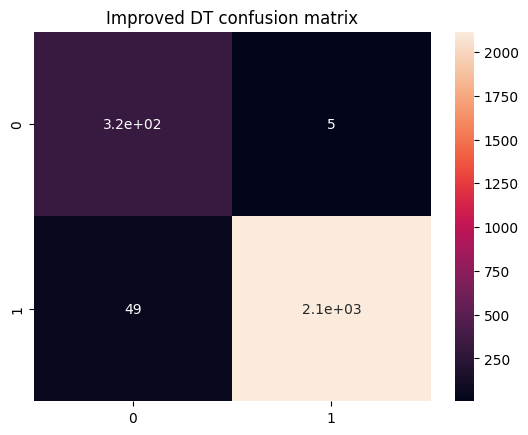

In [113]:
cf_matrix = confusion_matrix(y_test, y_pred_DT)

print("Confusion Matrix :")
print(cf_matrix)
import seaborn as sns
plt.title('Improved DT confusion matrix')
sns.heatmap(cf_matrix, annot=True)

# QUES 3. Adding More Machine Learning Models

In [35]:
from sklearn.datasets import make_moons
from sklearn.ensemble._bagging import BaggingClassifier
from sklearn.ensemble import VotingClassifier, StackingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.base import BaseEstimator


## Random Forest Model


In [86]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(oversampled_trainX_dfrop,oversampled_trainY)

y_pred=clf.predict(X_test_drop)
acc_rf = metrics.accuracy_score(y_test, y_pred)
print(acc_rf)

0.9863453815261044


In [34]:
import time


### XGBoost

In [56]:
xgb_model = xgb.XGBClassifier(random_state=42)

xgb_model.fit(oversampled_trainX_dfrop, oversampled_trainY)

y_pred = xgb_model.predict(X_test_drop)
res = accuracy_score(y_test,y_pred)

print(res)

0.98714859437751


## AdaBoost

In [91]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(random_state=42)
clf.fit(oversampled_trainX_dfrop,oversampled_trainY)
y_pre_ad =  clf.predict(X_test_drop)
ans = accuracy_score(y_test, y_pre_ad)
print(ans)

0.8518072289156626


In [96]:
bar_list=[ans *100 ,res *100, acc_rf*100,max(acc_dict_dt_wrapper.values())]
name_list=['AdaBoost','XGBoost','Random Forest','Decision Tree']
print(bar_list)


[85.18072289156626, 98.714859437751, 98.63453815261045, 97.83132530120481]


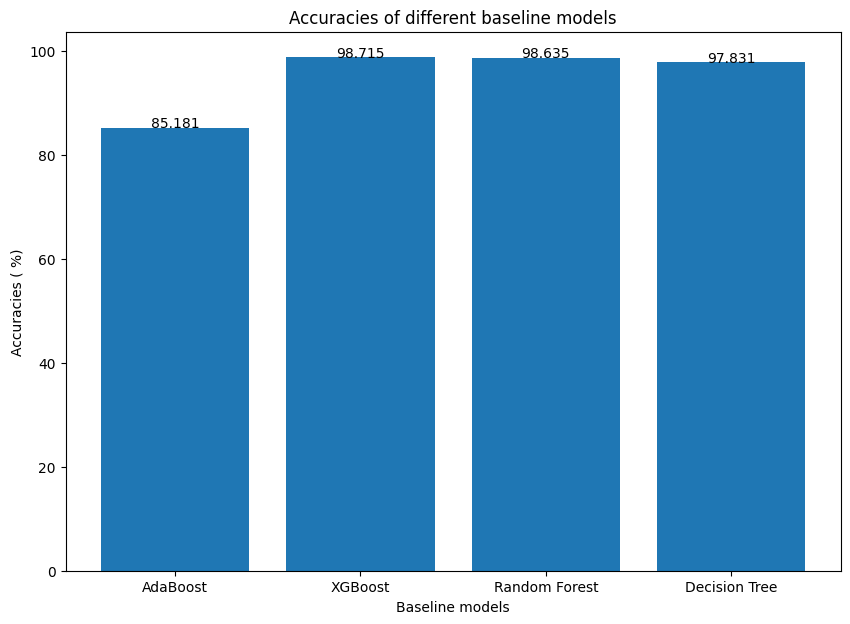

In [97]:
fig = plt.figure(figsize =(10, 7))
plt.bar(range(len(bar_list[0:5])),bar_list, tick_label=name_list)
for i in range(len(bar_list)):
        plt.text(i, bar_list[i], round(bar_list[i],3), ha = 'center')
plt.xlabel("Baseline models")
plt.ylabel("Accuracies ( %)")
plt.title("Accuracies of different baseline models")
plt.show()

### After this we have progressed with the XGBoost model as it was giving better results. So for the next stage of hyper-parameter we are going with XGBoost model.

# Hyper Parameter Tuning 

max_depth : 3  Accuracy: 0.9835341365461847
max_depth : 5  Accuracy: 0.989558232931727
max_depth : 7  Accuracy: 0.9875502008032129
max_depth : 8  Accuracy: 0.9887550200803212
max_depth : 10  Accuracy: 0.9875502008032129
max_depth : 12  Accuracy: 0.9887550200803212
max_depth : 15  Accuracy: 0.98714859437751



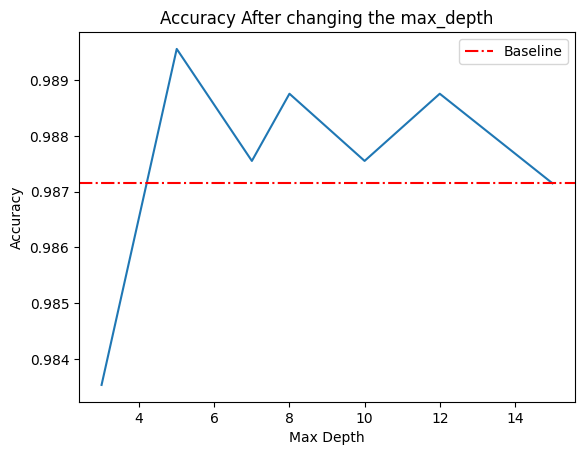


Learning Rate : 0.01  Accuracy: 0.8815261044176707
Learning Rate : 0.05  Accuracy: 0.9550200803212852
Learning Rate : 0.1  Accuracy: 0.9863453815261044
Learning Rate : 0.15  Accuracy: 0.9863453815261044
Learning Rate : 0.2  Accuracy: 0.9847389558232932
Learning Rate : 0.25  Accuracy: 0.9867469879518073



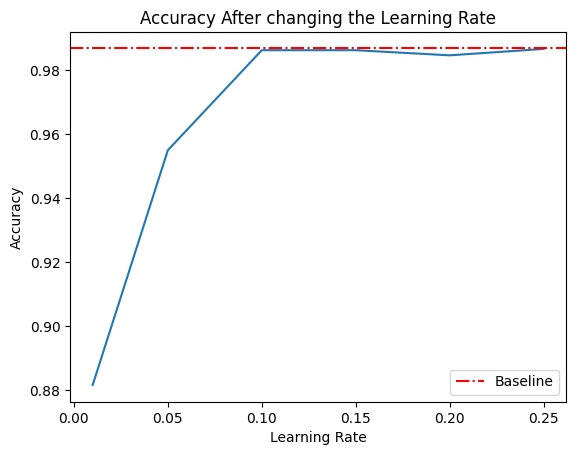

In [84]:
#Current best performer is the XGBoost model from after the second improvement
#Apply tuning on two parameter: Max depth and learning rate

#First tuning set: max_depth

max_depth = [3,5,7,8,10,12,15]
learning_rate = [0.01,0.05,0.10,0.15,0.20,0.25]
xgb1_final = []
for i in range(len(max_depth)):
    xgb_model = xgb.XGBClassifier(max_depth = max_depth[i],random_state=42)
    xgb_model.fit(oversampled_trainX_dfrop, oversampled_trainY)
    
    y_pred = xgb_model.predict(X_test_drop)
    xgb1_acc = accuracy_score(y_test,y_pred)
    print("max_depth :", max_depth[i], " Accuracy:", xgb1_acc)
    xgb1_final.append(xgb1_acc)

print()
plt.plot(max_depth, xgb1_final)
plt.axhline(res, color='r', linestyle='-.', label='Baseline')
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.title("Accuracy After changing the max_depth")
plt.legend()
plt.show()
print()

#Second tuning set: Learning Rate
xgb2_final = []
for i in range(len(learning_rate)):
    xgb_model = xgb.XGBClassifier(learning_rate = learning_rate[i],random_state=42)
    xgb_model.fit(oversampled_trainX_dfrop, oversampled_trainY)
    
    y_pred = xgb_model.predict(X_test_drop)
    xgb2_acc = accuracy_score(y_test,y_pred)
    print("Learning Rate :", learning_rate[i], " Accuracy:", xgb2_acc)
    xgb2_final.append(xgb2_acc)

print()
plt.plot(learning_rate, xgb2_final)
plt.axhline(res, color='r', linestyle='-.', label='Baseline')
plt.xlabel("Learning Rate")
plt.ylabel("Accuracy")
plt.title("Accuracy After changing the Learning Rate")
plt.legend()
plt.show()
print()

In [125]:
xgb_model = xgb.XGBClassifier(learning_rate = 0.25, max_depth =5, random_state=42)

xgb_model.fit(oversampled_trainX_dfrop, oversampled_trainY)

y_pred = xgb_model.predict(X_test_drop)
res = accuracy_score(y_test,y_pred)

print(res)

0.9847389558232932


### After changing the max_depth we can conclude that the hyperparameter models turns better in comparison to the baseline XGboost model. Giving the highest accuracy at max_depth = 5. After, changing the Learning Rate parameter it has come to notice that it increase suddenly and then the accuracy matches with the baseline model. Highest accuracy comes out to be Learning rate 0.25.

## Ques 5 CONCLUSION

Firstly, after performing on the 5 models it was discovered that the model perform better on the Decision Tree in comparsion to the other models

After doing fixing the imbalance dataset. We now moved to the question 2. Where main aim was to increase the accuracy of the model via dimensionality reduction techniques and the feature selection.
PCA and Auto Encoder did not give better results in comparison to the baseline. After that feature selection methods were used which gave better results. After all the visualization Wrapper method was chosen for feature selection as it was better than the baseline model. This was the improvement made and some features were removed from the dataset.

Coming to 3rd question, we had to use more machine learning models we made graphs between the new models and compared to the earlier improvement. It was found out that the XGBoost was better in comparsion to Adaboost, Random Forest and the Decision Tree.
So for the ques 4 we took the XGBoost model

Coming to the 4th question, We took 2 parameters that were batch_size and the learning rate. And plots were made by seeing the visualization it was seen the max_depth=5 accuracy was the highest and with the learning rate = 0.25.

Lastlty the accuracy of the tuned model was lower than the baseline model of the XGBoost